In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 kB 15.4 MB/s eta 0:00:00a 0:00:01


In [37]:
import wandb
import random
from ultralytics import YOLO
import matplotlib.pyplot as plt
import math
import os
import cv2 as cv

In [4]:
#pre-trained model
model = YOLO("yolov8n-cls.pt")

100%|██████████| 5.31M/5.31M [00:00<00:00, 73.9MB/s]


In [ ]:
# results = model.train(data="/kaggle/input/fashion-small-dataset/", epochs=100)

In [5]:
#Trained Model
model_trained = YOLO("/kaggle/input/yolo-res/results/runs/classify/train/weights/best.pt")

In [44]:
def open_img(img):
    image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return image
    
def test_accuracy_yolo(test_dir, n_samples=8, plot_random=True):
    test_folder = os.listdir(test_dir)
    i = 0
    v = 0
    resultsDict = {}

    for folder in test_folder:
        results = model_trained(f"{test_dir}/{folder}", verbose=False)
        resultsDict.update({folder:results})

        for result in results:
            i += 1
            top1 = result.probs.top1
            classes = result.names
            top1_class_name = classes[top1]

            if top1_class_name == folder:
                v += 1

    test_accuracy = v / i

    if plot_random==True:
        c = 4
        r = math.ceil(n_samples/c)
        plt.figure(figsize=(20, 5*r+1))
        plt.suptitle(f"visualizing random values with clear labels. \n The accuracy on the data is passed {test_accuracy*100}%.")
        for i in range(n_samples):
            random_label = random.choice(list(resultsDict.keys()))
            random_path = f"{test_dir}/{random_label}"
            pred_vals = resultsDict[random_label]
            random_result = random.choice(pred_vals)
            random_top1 = random_result.probs.top1
            classes = random_result.names
            random_top1_class_name = classes[random_top1]
            random_top1cont = random_result.probs.top1conf.tolist()

            plt.subplot(r, c, i+1)
            plt.imshow(open_img(random_result.orig_img))
            plt.ylabel(f"Actual: {random_label}")
            plt.xlabel(f"Predicted: {random_top1_class_name}")
            plt.title(f"Confidence Interval: {random_top1cont:.2f}")            

    return test_accuracy, resultsDict, classes

Accuracy on Validation Data is 94.0%


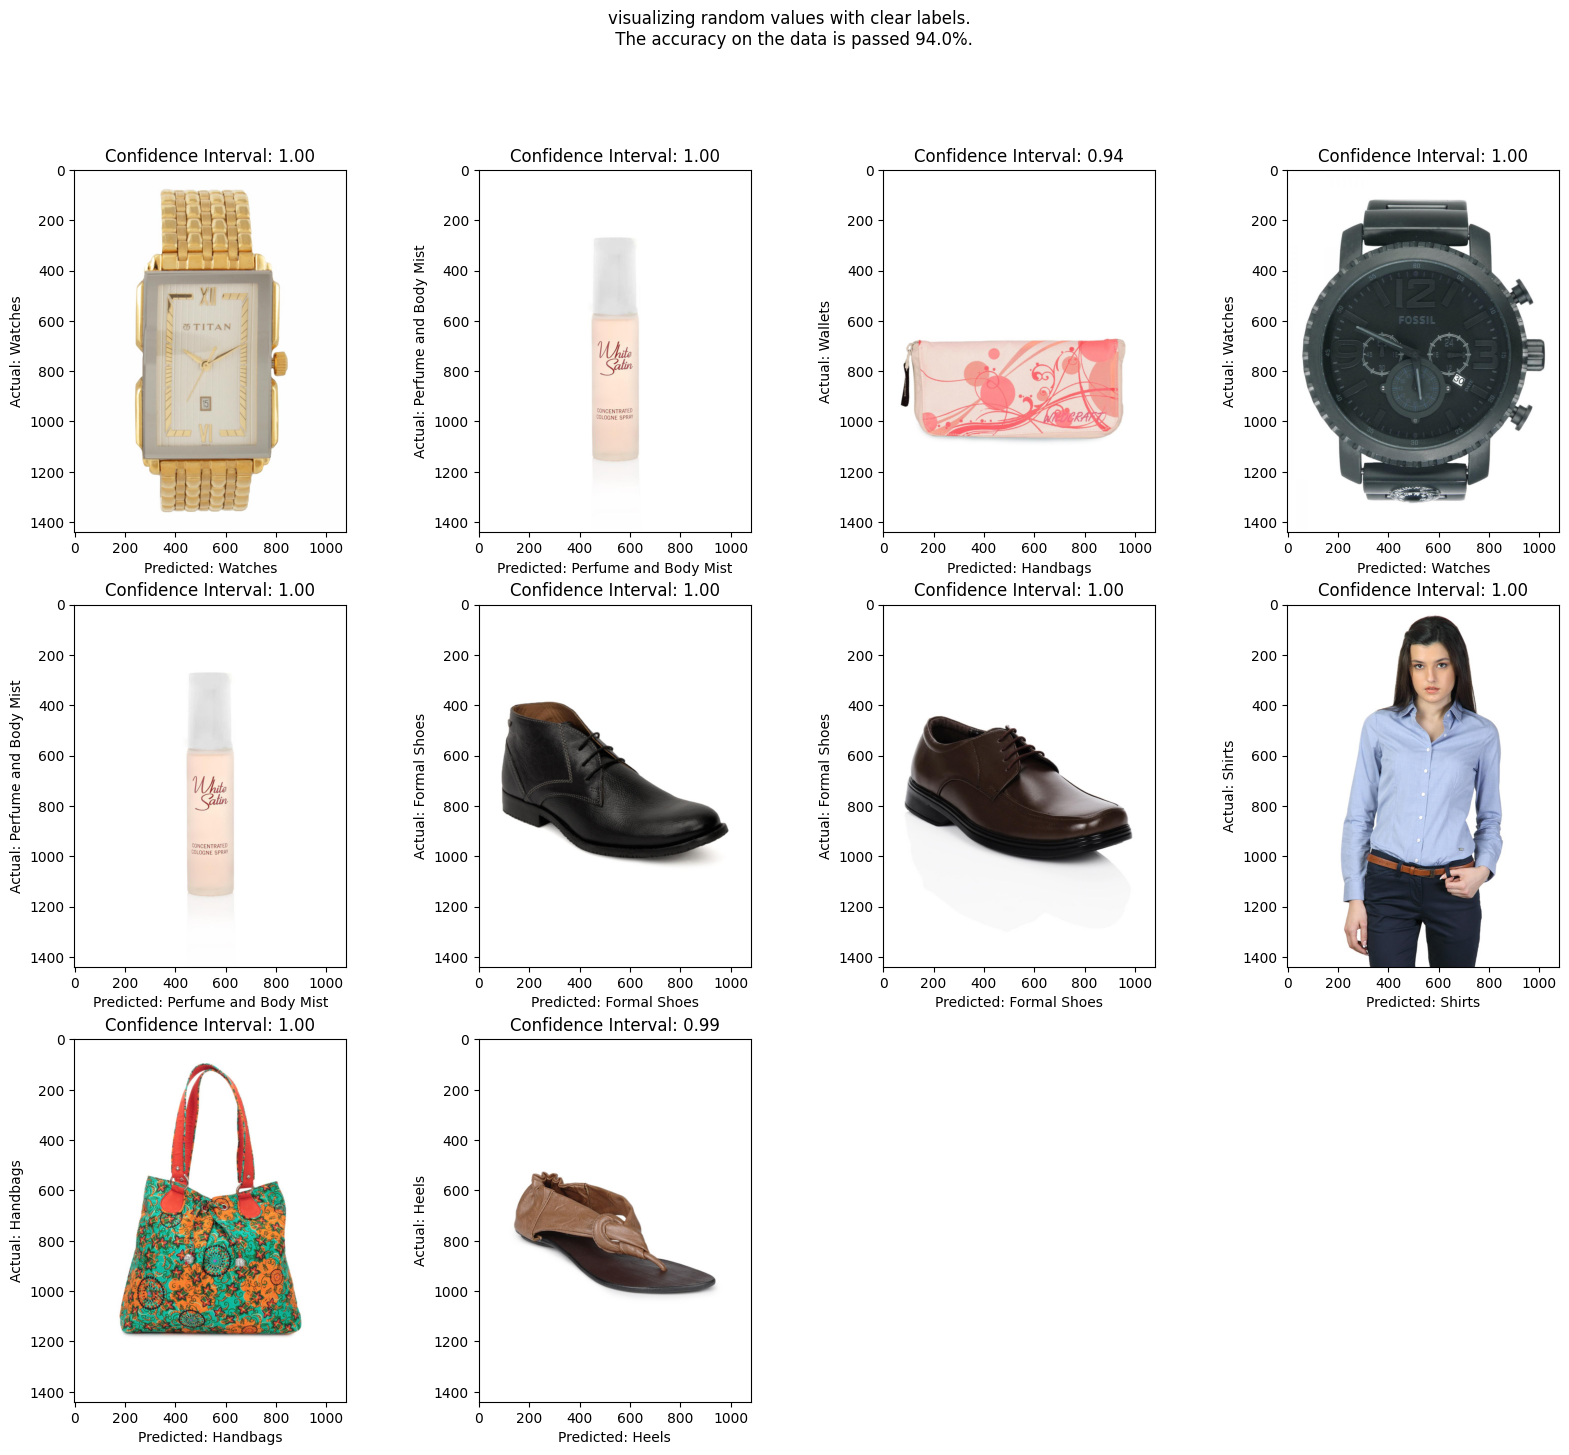

In [45]:
val_path = "/kaggle/input/fashion-small-dataset/test"
val_accuracy, predict_dict, classes = test_accuracy_yolo(val_path, n_samples=10)
print(f"Accuracy on Validation Data is {val_accuracy * 100}%")

Accuracy on Validation Data is 95.625%


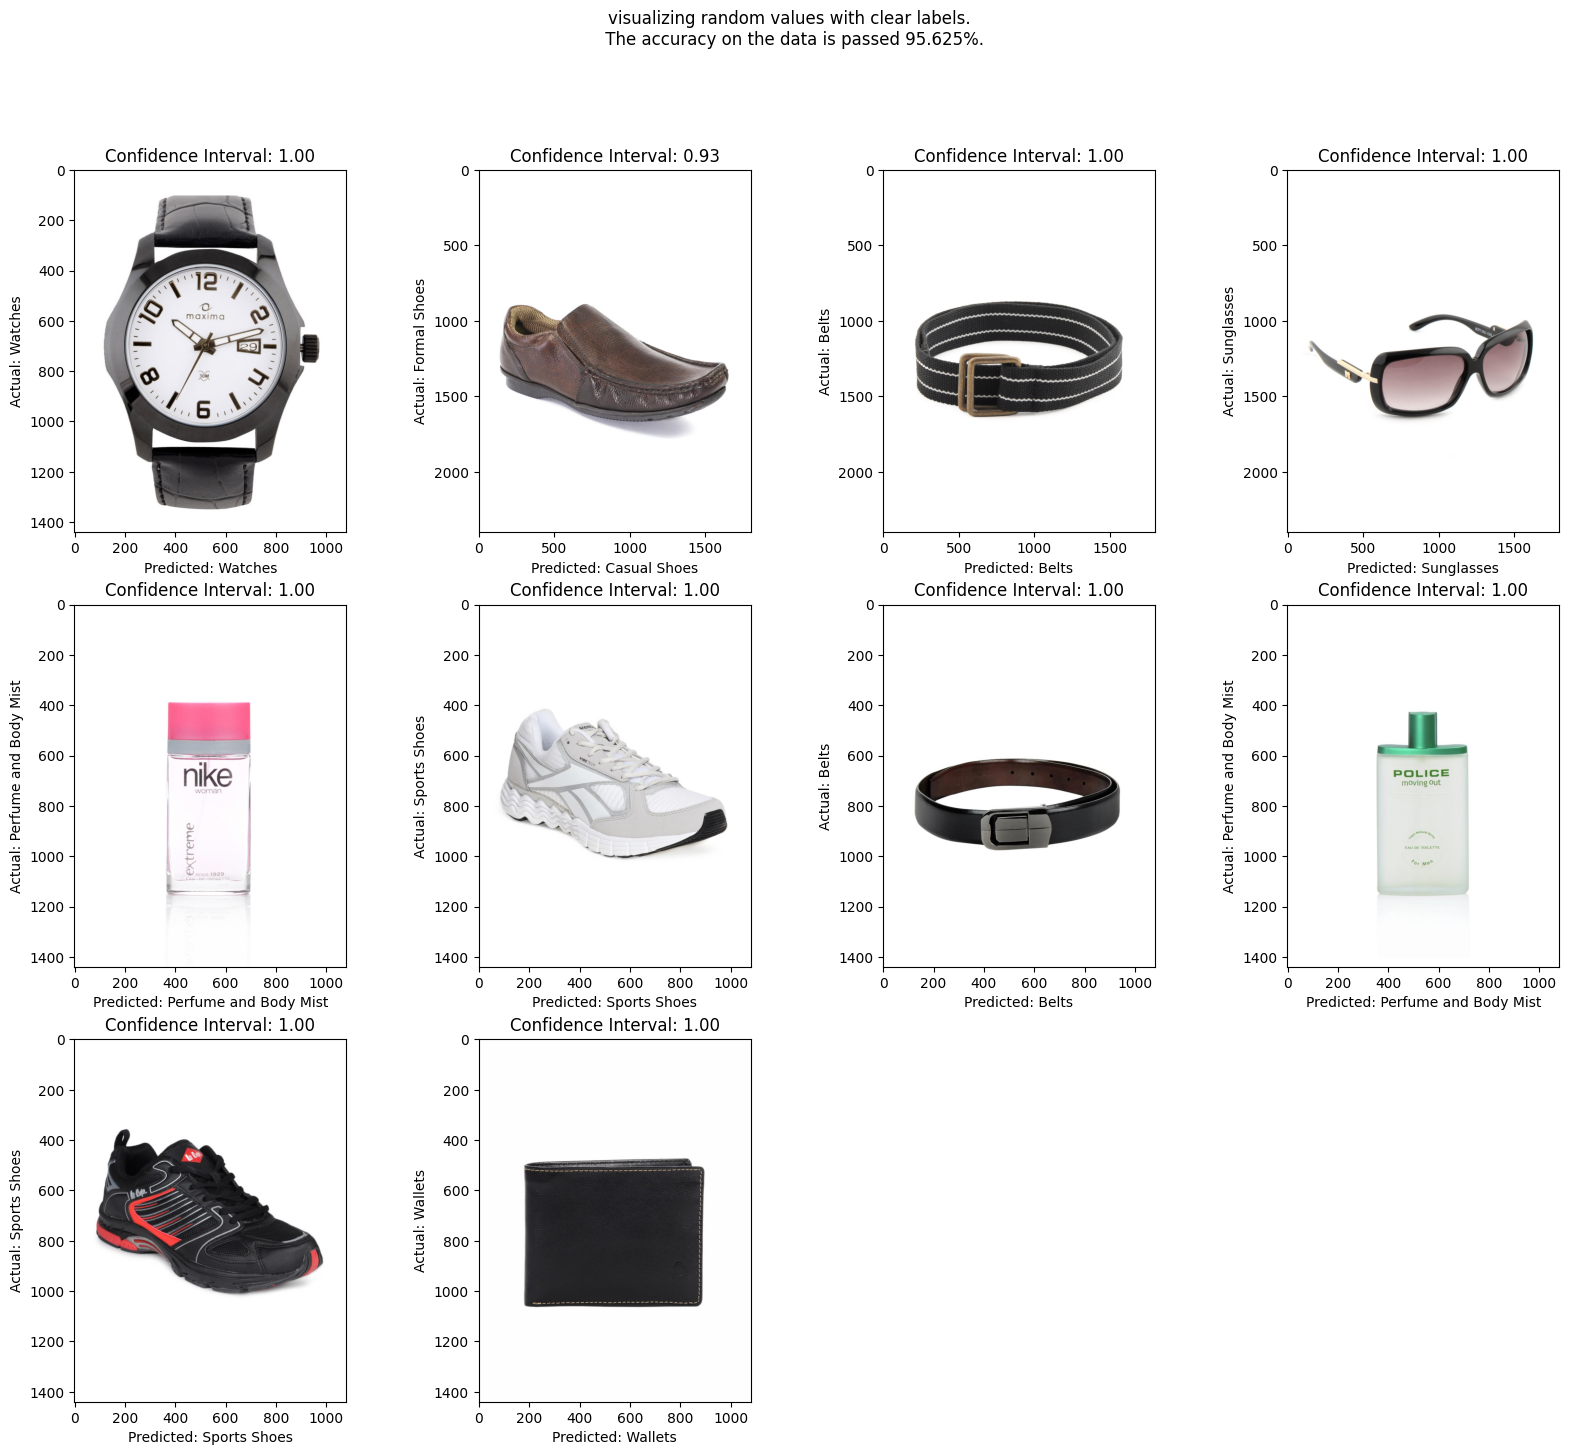

In [48]:
val_path = "/kaggle/input/fashion-small-dataset/val"
val_accuracy, predict_dict, classes = test_accuracy_yolo(val_path, n_samples=10)
print(f"Accuracy on Validation Data is {val_accuracy * 100}%")